# Take an image and display its water reflection

Select Water Type:
Clear Water:1 	Turbid Water:2 	1
Enter Image Path: Shreyas_Patil.jpeg


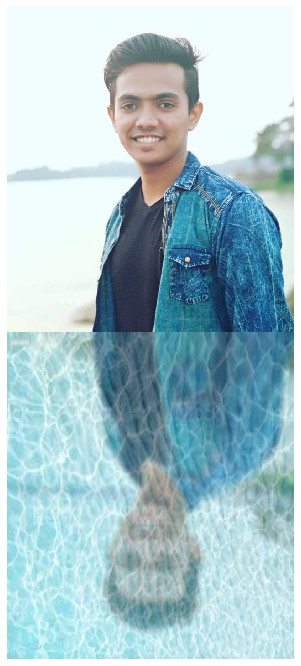

In [1]:
def Water_Reflection(rb):
    
    ''' This function shows how the water reflection of an object will look like. 
    The value of parameter rb will determine the blurriness of the object in the reflection.
    The higher the value of rb, more blurry the reflection will be. '''
    
    #Importing libraries
    from PIL import Image
    from PIL import ImageFilter
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    
    #Selecting preferred water type
    water_type = int(input("Select Water Type:\nClear Water:1 \tTurbid Water:2 \t"))
    
    #Selecting image from device
    path = input("Enter Image Path: ")
    object_image = Image.open(path)
    
    #Selecting water image
    water_image = Image.open("Water2.png")
    image_copy = water_image.copy()
    r, g, b = image_copy.split()
    flipped_image = Image.merge("RGB", (b,g,r))
    if water_type == 2:
        water_image = flipped_image.copy()
        
    #Getting our images ready
    object_image_blur = object_image.filter(ImageFilter.BoxBlur(radius=rb))
    blend_image1 = water_image.resize(object_image_blur.size)
    blend_image2 = object_image_blur.copy()

    #Creating the reflection
    blended_image = Image.blend(blend_image1,blend_image2,0.6)
    reflection = blended_image.transpose(Image.FLIP_TOP_BOTTOM)

    #Getting frame ready to fit the actual image and its reflection
    rows=object_image.size[1]
    cols=object_image.size[0]
    composite_image = np.zeros((2*rows,cols, 3), dtype=np.double)
    
    #Fitting actual image and its reflection in the frame
    composite_image[:rows, :cols, :] = object_image
    n_cols, n_rows = reflection.size[:2]
    composite_image[rows:rows + n_rows, 0: n_cols] = reflection
    
    #Making the frame viewable
    composite_image = composite_image.astype(int)
    
    #Displaying final image
    plt.figure(figsize=(10,12))
    plt.imshow(composite_image)
    plt.axis('off')

Water_Reflection(rb=10)